# Medicare Fraud Detection

### Data 698: Data Science Research Project - Spring 2019

### Student: Chunhui Zhu

Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2016.csv: https://data.cms.gov/Medicare-Physician-Supplier/Medicare-Provider-Utilization-and-Payment-Data-Phy/utc4-f9xp

LEIE2019.csv: https://oig.hhs.gov/exclusions/exclusions_list.asp

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt
import pickle

import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [2]:
def loadfrauddata (year):
    y=str(year)
    fraud_pkl=open("fraud_"+str(year)+"_pickle","rb")
    fraud_df=pickle.load(fraud_pkl)
    print("The number of fraud_df found in " + y +" is " + str(len(fraud_df)) + ".")
    fraud_pkl.close()
    return (fraud_df)

In [3]:
df_fraud2016=loadfrauddata(2016)
df_fraud2015=loadfrauddata(2015)
df_fraud2014=loadfrauddata(2014)
df_fraud2013=loadfrauddata(2013)
df_fraud2012=loadfrauddata(2012)

The number of fraud_df found in 2016 is 2843.
The number of fraud_df found in 2015 is 5110.
The number of fraud_df found in 2014 is 7993.
The number of fraud_df found in 2013 is 10817.
The number of fraud_df found in 2012 is 13723.


In [4]:
list2016=df_fraud2016.npi.unique().tolist()
list2015=df_fraud2015.npi.unique().tolist()
list2014=df_fraud2014.npi.unique().tolist()
list2013=df_fraud2013.npi.unique().tolist()
list2012=df_fraud2012.npi.unique().tolist()

In [5]:
list_npi= list2016+list2015+list2014+list2013+list2012

In [6]:
from collections import Counter
l=Counter(list_npi)
cont_list=dict((l, i) for l, i in l.items() if i == 5)

In [7]:
cont_fraud_list=cont_list.keys()
len(cont_fraud_list)

247

## Type by year

In [8]:
df2016_fraud_cont=df_fraud2016[df_fraud2016['npi'].isin(cont_fraud_list)]
df2016_fraud_cont.type.value_counts().head(10)

Internal Medicine                      605
Family Practice                        333
Podiatry                               222
Clinical Laboratory                    222
Neurology                              136
Anesthesiology                         119
Cardiovascular Disease (Cardiology)     92
Interventional Pain Management          87
Pain Management                         87
Hematology-Oncology                     70
Name: type, dtype: int64

In [9]:
df2015_fraud_cont=df_fraud2015[df_fraud2015['npi'].isin(cont_fraud_list)]
df2015_fraud_cont.type.value_counts().head(10)

Internal Medicine                 841
Family Practice                   504
Podiatry                          265
Clinical Laboratory               222
Anesthesiology                    192
Cardiology                        157
Neurology                         157
Interventional Pain Management    131
Pain Management                    84
Obstetrics/Gynecology              82
Name: type, dtype: int64

In [10]:
df2014_fraud_cont=df_fraud2014[df_fraud2014['npi'].isin(cont_fraud_list)]
df2014_fraud_cont.type.value_counts().head(10)

Internal Medicine                 911
Family Practice                   568
Podiatry                          331
Clinical Laboratory               195
Cardiology                        176
Anesthesiology                    164
Neurology                         163
Pain Management                   106
Interventional Pain Management    106
Geriatric Medicine                 98
Name: type, dtype: int64

In [11]:
df2013_fraud_cont=df_fraud2013[df_fraud2013['npi'].isin(cont_fraud_list)]
df2013_fraud_cont.type.value_counts().head(10)

Internal Medicine                 1004
Family Practice                    603
Podiatry                           367
Cardiology                         198
Anesthesiology                     196
Clinical Laboratory                190
Neurology                          139
Interventional Pain Management     137
Pain Management                    111
Geriatric Medicine                  86
Name: type, dtype: int64

In [12]:
df2012_fraud_cont=df_fraud2012[df_fraud2012['npi'].isin(cont_fraud_list)]
df2012_fraud_cont.type.value_counts().head(10)

Internal Medicine                 994
Family Practice                   642
Podiatry                          353
Cardiology                        229
Clinical Laboratory               212
Anesthesiology                    172
Neurology                         162
Interventional Pain Management    122
Geriatric Medicine                 98
Pain Management                    89
Name: type, dtype: int64

## State

In [13]:
df2016_fraud_cont.state.value_counts().head(10)

TX    312
NY    273
NJ    220
CA    202
PA    188
MI    172
IL    110
MD    102
FL     95
VA     85
Name: state, dtype: int64

In [14]:
df2015_fraud_cont.state.value_counts().head(10)

TX    330
NY    329
CA    274
MI    264
PA    254
NJ    237
IL    188
MD    133
IN    132
FL    131
Name: state, dtype: int64

In [15]:
df2014_fraud_cont.state.value_counts().head(10)

NY    331
TX    315
MI    315
CA    299
PA    271
NJ    225
IL    211
GA    178
MD    142
FL    140
Name: state, dtype: int64

In [16]:
df2013_fraud_cont.state.value_counts().head(10)

MI    370
NY    349
TX    335
CA    323
PA    314
NJ    247
IL    241
GA    172
FL    162
MD    126
Name: state, dtype: int64

In [17]:
df2012_fraud_cont.state.value_counts().head(10)

MI    383
NY    376
TX    337
CA    291
PA    290
IL    267
NJ    253
FL    162
GA    160
WI    131
Name: state, dtype: int64

## City

In [18]:
df2016_fraud_cont.city.value_counts().head(10)

WEBSTER          129
DALLAS            80
LAREDO            55
PATERSON          51
DAPHNE            48
ALBANY            48
OKLAHOMA CITY     44
DETROIT           42
HUNTINGTON        41
CHEVERLY          37
Name: city, dtype: int64

In [19]:
df2015_fraud_cont.city.value_counts().head(10)

WEBSTER       139
DETROIT        64
DALLAS         59
LAREDO         58
PATERSON       58
HUNTINGTON     57
ALTOONA        51
CHICAGO        47
DAPHNE         46
ALBANY         44
Name: city, dtype: int64

In [20]:
df2014_fraud_cont.city.value_counts().head(10)

WEBSTER       145
CHICAGO        70
DETROIT        63
LAREDO         61
HUNTINGTON     60
PATERSON       54
LILBURN        53
HAVERTOWN      50
DAPHNE         48
ALBANY         45
Name: city, dtype: int64

In [21]:
df2013_fraud_cont.city.value_counts().head(10)

WEBSTER       131
LAREDO         73
DETROIT        71
CHICAGO        67
ALBANY         65
HOUSTON        56
PATERSON       55
COLUMBUS       53
FLUSHING       53
HUNTINGTON     51
Name: city, dtype: int64

In [22]:
df2012_fraud_cont.city.value_counts().head(10)

WEBSTER     132
CHICAGO      87
HOUSTON      73
ALBANY       71
OSCEOLA      70
FLUSHING     64
DETROIT      62
PATERSON     61
LAREDO       59
WESTLAND     53
Name: city, dtype: int64

In [23]:
df2015_fraud_cont.columns

Index(['npi', 'type', 'gender', 'hcpcs_c', 'line_srvc_cnt', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'avg_allowed_amt', 'avg_payment_amt',
       'avg_submitted_chrg_amt', 'city', 'state', 'Fraud'],
      dtype='object')

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D49B1DFCC0>,
      dtype=object)

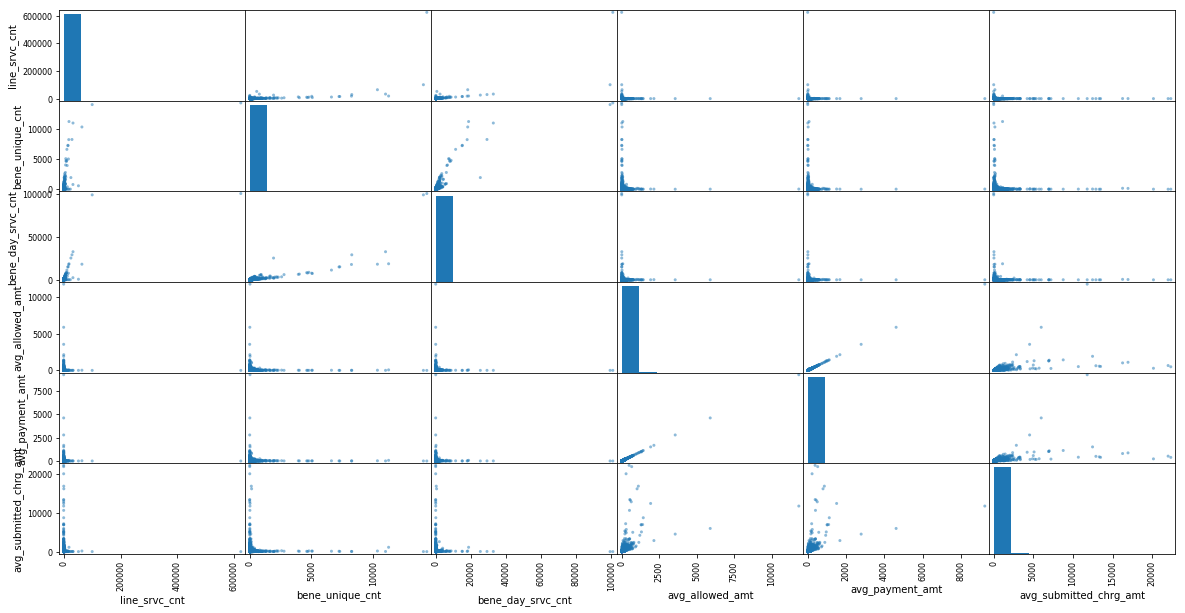

In [25]:
from pandas.tools import plotting
plotting.scatter_matrix(df2015_fraud_cont[['line_srvc_cnt', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'avg_allowed_amt', 'avg_payment_amt',
       'avg_submitted_chrg_amt',]],figsize=(20,10)) 

## References:

Variance Inflation Factor (VIF) Explained
https://etav.github.io/python/vif_factor_python.html